Business Problem

In e-commerce platform millions of users visit websites daily.However:Only a small percentage actually purchase

Most visitors leave without buying,Businesses cannot apply the same marketing strategy to all users

Treating every visitor identically results in:

High marketing cost

Low conversion rate

Poor customer experience

Business Challenge

The key challenge faced by online businesses is:

“How can we identify a visitor’s intent level in real time and take appropriate business action?”

Traditional systems only predict:

Purchase → Yes or No

But this is not enough for business decision-making.

Our Businesses need behavior segmentation, not just prediction.

Solution Provided by This Project

This project classifies online shoppers into three meaningful behavior categories:

Class	Visitor Type	Business Meaning
0	Browsing Visitor	Casual visitor with low intent
1	Interested Visitor	High engagement but not yet purchased
2	Purchasing Visitor	Strong buying intent

This enables intent-aware decision making.

## Multiclass classfication Problem with three categories of target column

1.Personalized Marketing Strategy

Browsing Visitor

Show minimal promotions

Avoid aggressive ads

Focus on brand awareness

Interested Visitor

Show limited-time offers

Provide discount coupons

Trigger email or push notifications

Purchasing Visitor

Provide smooth checkout

Offer bundled products

Recommend premium or complementary items

Result: Higher conversion rate

2⃣. Real-Time Recommendation Systems

E-commerce platforms can integrate this model with recommendation engines.

Example:

Browsing → Popular products

Interested → Similar products

Purchasing → Frequently bought together

This improves:

Click-through rate

Average order value

Customer satisfaction

3️. Dynamic Website Personalization

Based on predicted behavior class:

Visitor Type	Website Action
Browsing	Simple UI, low distractions
Interested	Highlight reviews, ratings
Purchasing	Emphasize checkout & offers

This happens in real time while the user is browsing.

4️. Marketing Cost Optimization

Without behavior classification:

Ads shown to everyone

High marketing expense

With this model:

Ads shown only to interested and purchasing users

Browsing users excluded

Reduces wasted advertising spend
Improves ROI

5⃣. Customer Journey Analysis

Businesses can track:

Browsing → Interested → Purchasing flow

Drop-off points

Time spent at each stage

This helps:

UX improvement

Funnel optimization

Strategic business planning

6️. Business Intelligence & Reporting

Management dashboards can display:

Percentage of browsing users

Conversion readiness

Purchase intent trends

Example insight:

“60% of users are browsing, but only 12% reach purchasing stage.”

This directly influences:

Pricing strategy

Campaign timing

Product placement

This model can be executed:

When a user clicks pages

When session data updates

Before checkout

The prediction can be refreshed every few seconds using:

PageValues

BounceRates

ExitRates

Session duration

Hence, decisions are made during live user sessions, not after.

Industry Relevance

This use case is applicable to:

E-commerce platforms

Online marketplaces

Travel booking websites

OTT subscription platforms

Online education portals

SaaS product onboarding systems

Anywhere user behavior matters.

This project enables real-time behavioral segmentation of online shoppers, 
allowing businesses to deliver personalized experiences, optimize marketing costs, and improve conversion rates using machine learning.

Title

## Multiclass Classification of Online Shopper Behavior Using Machine Learning Models

Goal

Classify online visitors into:

Browsing visitor

Interested visitor

Purchasing visitor

This is a behavior-based multiclass ML project

Steps:

Understand dataset

Prepare dataset (make it multiclass)

Data preprocessing

Train–test split

Train 6 ML models

Evaluate using 6 metrics

Save trained models

Build Streamlit app

Deploy on Streamlit Cloud

Prepare final PDF

In [1]:
#importing libraries
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import regex

In [2]:
df=pd.read_csv(r"C:\Users\Admin4\Downloads\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv")

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
#EDA

#DATA PREPROCESSING

#checks nulls values of columns if present any
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
from sklearn.preprocessing import LabelEncoder

# convert object columns
le = LabelEncoder()
df["Month"] = le.fit_transform(df["Month"])
df["VisitorType"] = le.fit_transform(df["VisitorType"])

# convert boolean columns
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)


In [7]:
zero_threshold = 0.60   # 60%

zero_columns = []

for col in df.columns:
    if df[col].dtype != "object":
        zero_ratio = (df[col] == 0).mean()
        if zero_ratio >= zero_threshold:
            zero_columns.append((col, round(zero_ratio * 100, 2)))

zero_columns


[('Informational', np.float64(78.66)),
 ('Informational_Duration', np.float64(80.49)),
 ('PageValues', np.float64(77.86)),
 ('SpecialDay', np.float64(89.85)),
 ('Weekend', np.float64(76.74)),
 ('Revenue', np.float64(84.53))]

In [8]:
cols_to_drop = ["Informational","Informational_Duration"]

#If a column has ≥ 60% zeros, you can consider dropping it after checking its business meaning.
df = df.drop(columns=cols_to_drop)

In [9]:
df

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


#Target column is Behavior_Class

In [10]:
def behavior_class(row):
    if row["Revenue"] == 1:
        return 2          # Purchasing
    elif row["PageValues"] > 0:
        return 1          # Interested
    else:
        return 0          # Browsing

df["Behavior_Class"] = df.apply(behavior_class, axis=1)


In [11]:
df = df.drop(["Revenue"], axis=1)

In [12]:
df.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Behavior_Class
0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [13]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Behavior_Class'],
      dtype='object')

In [14]:
df.shape

(12330, 16)

In [15]:
drop_cols = [
    "Administrative",
    "Administrative_Duration"
]
#These have very high zero percentage and weak intent.HIGH SPARSITY FEATURES (DROP)
#If a column has ≥ 60% zeros, you can consider dropping it after checking its business meaning

In [16]:
df = df.drop(columns=drop_cols)


In [17]:
#TECHNICAL / SYSTEM FEATURES (OPTIONAL)
#These are device and routing related.
#So we can drop the below features

In [18]:
drop_cols = [
    "OperatingSystems",
    "Browser", "Region",
       "TrafficType"
]

In [19]:
df = df.drop(columns=drop_cols)

In [20]:
#Other Features to keep #STRONG BEHAVIOR FEATURES.These directly represent shopping intent.
#CONTEXTUAL FEATURES.These don’t indicate intent directly, but improve model learning. 


In [21]:
df.head()

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Behavior_Class
0,1,0.000000,0.20,0.20,0.0,0.0,2,2,0,0
1,2,64.000000,0.00,0.10,0.0,0.0,2,2,0,0
2,1,0.000000,0.20,0.20,0.0,0.0,2,2,0,0
3,2,2.666667,0.05,0.14,0.0,0.0,2,2,0,0
4,10,627.500000,0.02,0.05,0.0,0.0,2,2,1,0


Features with more than 60% zero values were analyzed to identify low-variance attributes.
Such features were optionally removed to reduce noise and improve model generalization, while ensuring that no target-related or business-critical variables were dropped.
A new multiclass target variable named Behavior_Class was engineered to represent different levels of user intent, while the original Revenue attribute was excluded from model training to prevent data leakage.
Sessions with low product interaction, zero page value, and moderate bounce rates are categorized as browsing users, indicating exploratory behavior without strong purchase intent.    

In [22]:
df.head()

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Behavior_Class
0,1,0.000000,0.20,0.20,0.0,0.0,2,2,0,0
1,2,64.000000,0.00,0.10,0.0,0.0,2,2,0,0
2,1,0.000000,0.20,0.20,0.0,0.0,2,2,0,0
3,2,2.666667,0.05,0.14,0.0,0.0,2,2,0,0
4,10,627.500000,0.02,0.05,0.0,0.0,2,2,1,0


This allows businesses to understand customer intent level instead of only predicting purchase or no-purchase.

Multiclass Classification of Online Shopper Behavior Using Machine Learning Models

In [23]:
df['Behavior_Class'].value_counts()

Behavior_Class
0    9230
2    1908
1    1192
Name: count, dtype: int64

(np.float64(-1.0999960823984403),
 np.float64(1.1000000868791122),
 np.float64(-1.0999998311763604),
 np.float64(1.0999963381011921))

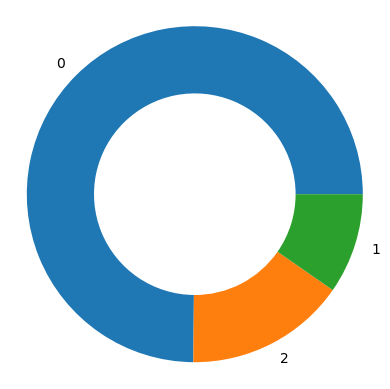

In [24]:
# value counts of primary fuel column
sorted_counts=df['Behavior_Class'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

Casual visitor with low intent are high in numbers

In [25]:
df.describe()

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Behavior_Class
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,1.718329,0.232603,0.406164
std,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.690759,0.422509,0.742111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000
75%,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,2.000000,0.000000,1.000000
max,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,2.000000,1.000000,2.000000


since max values are high in numbers so there are high in chance of count of outliers in ProductRelated,	ProductRelated_Duration,PageValues

In [26]:
import pandas as pd

# Correlation with target
correlation = df.corr()["Behavior_Class"].sort_values(ascending=False)

print(correlation)


Behavior_Class             1.000000
PageValues                 0.560015
ProductRelated             0.258441
ProductRelated_Duration    0.241251
Month                      0.083866
Weekend                    0.030556
VisitorType               -0.065726
SpecialDay                -0.088588
BounceRates               -0.186059
ExitRates                 -0.257036
Name: Behavior_Class, dtype: float64


PageValues is highly correlated to target column which is most impactfull

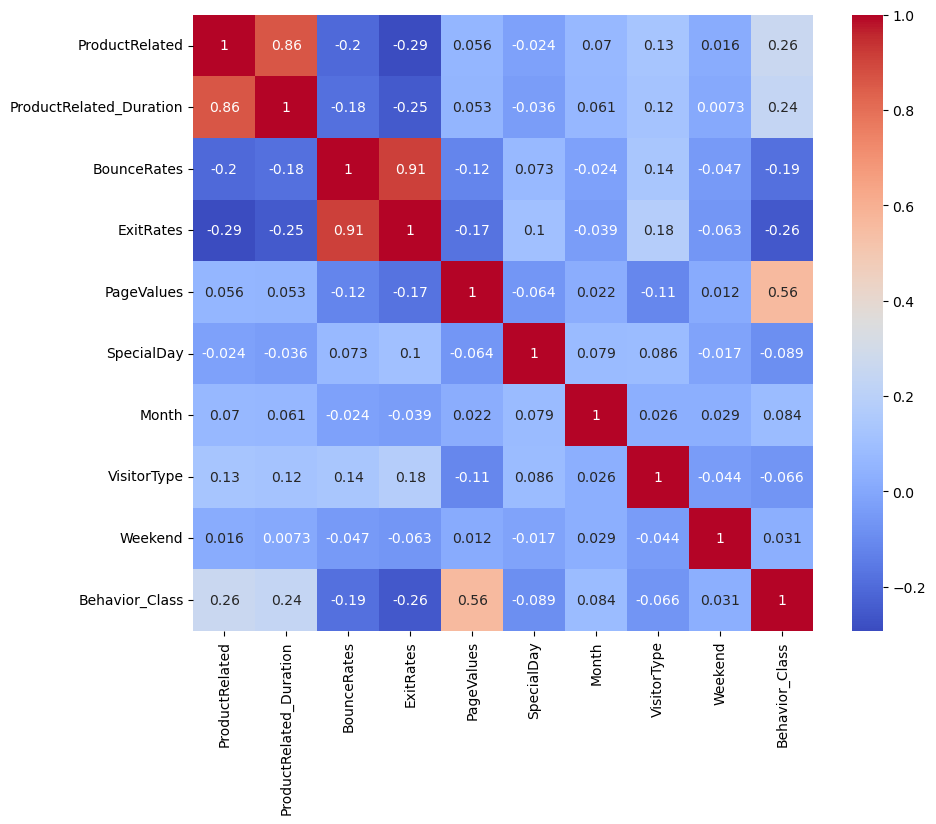

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


PageValues and ExitRates are most highly positively and negatively correlated to target column which is most impactfull



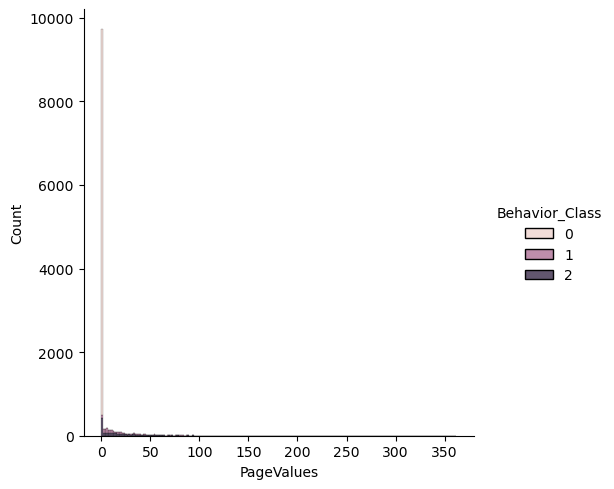

In [28]:
sns.displot(df, x="PageValues", hue="Behavior_Class", multiple="stack")

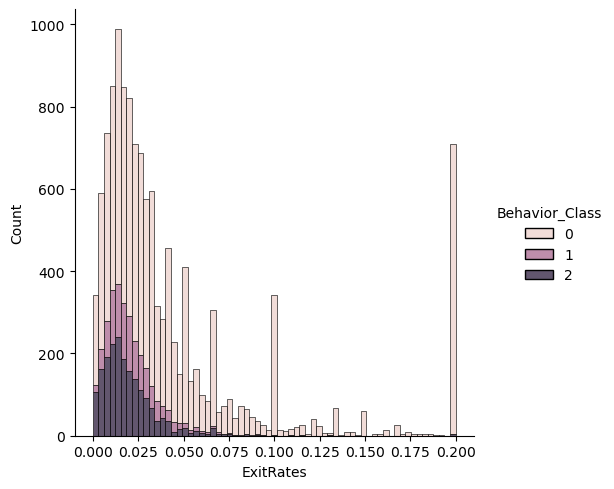

In [29]:
sns.displot(df, x="ExitRates", hue="Behavior_Class", multiple="stack")

ProductRelated and ExitRates are rightly skewed 

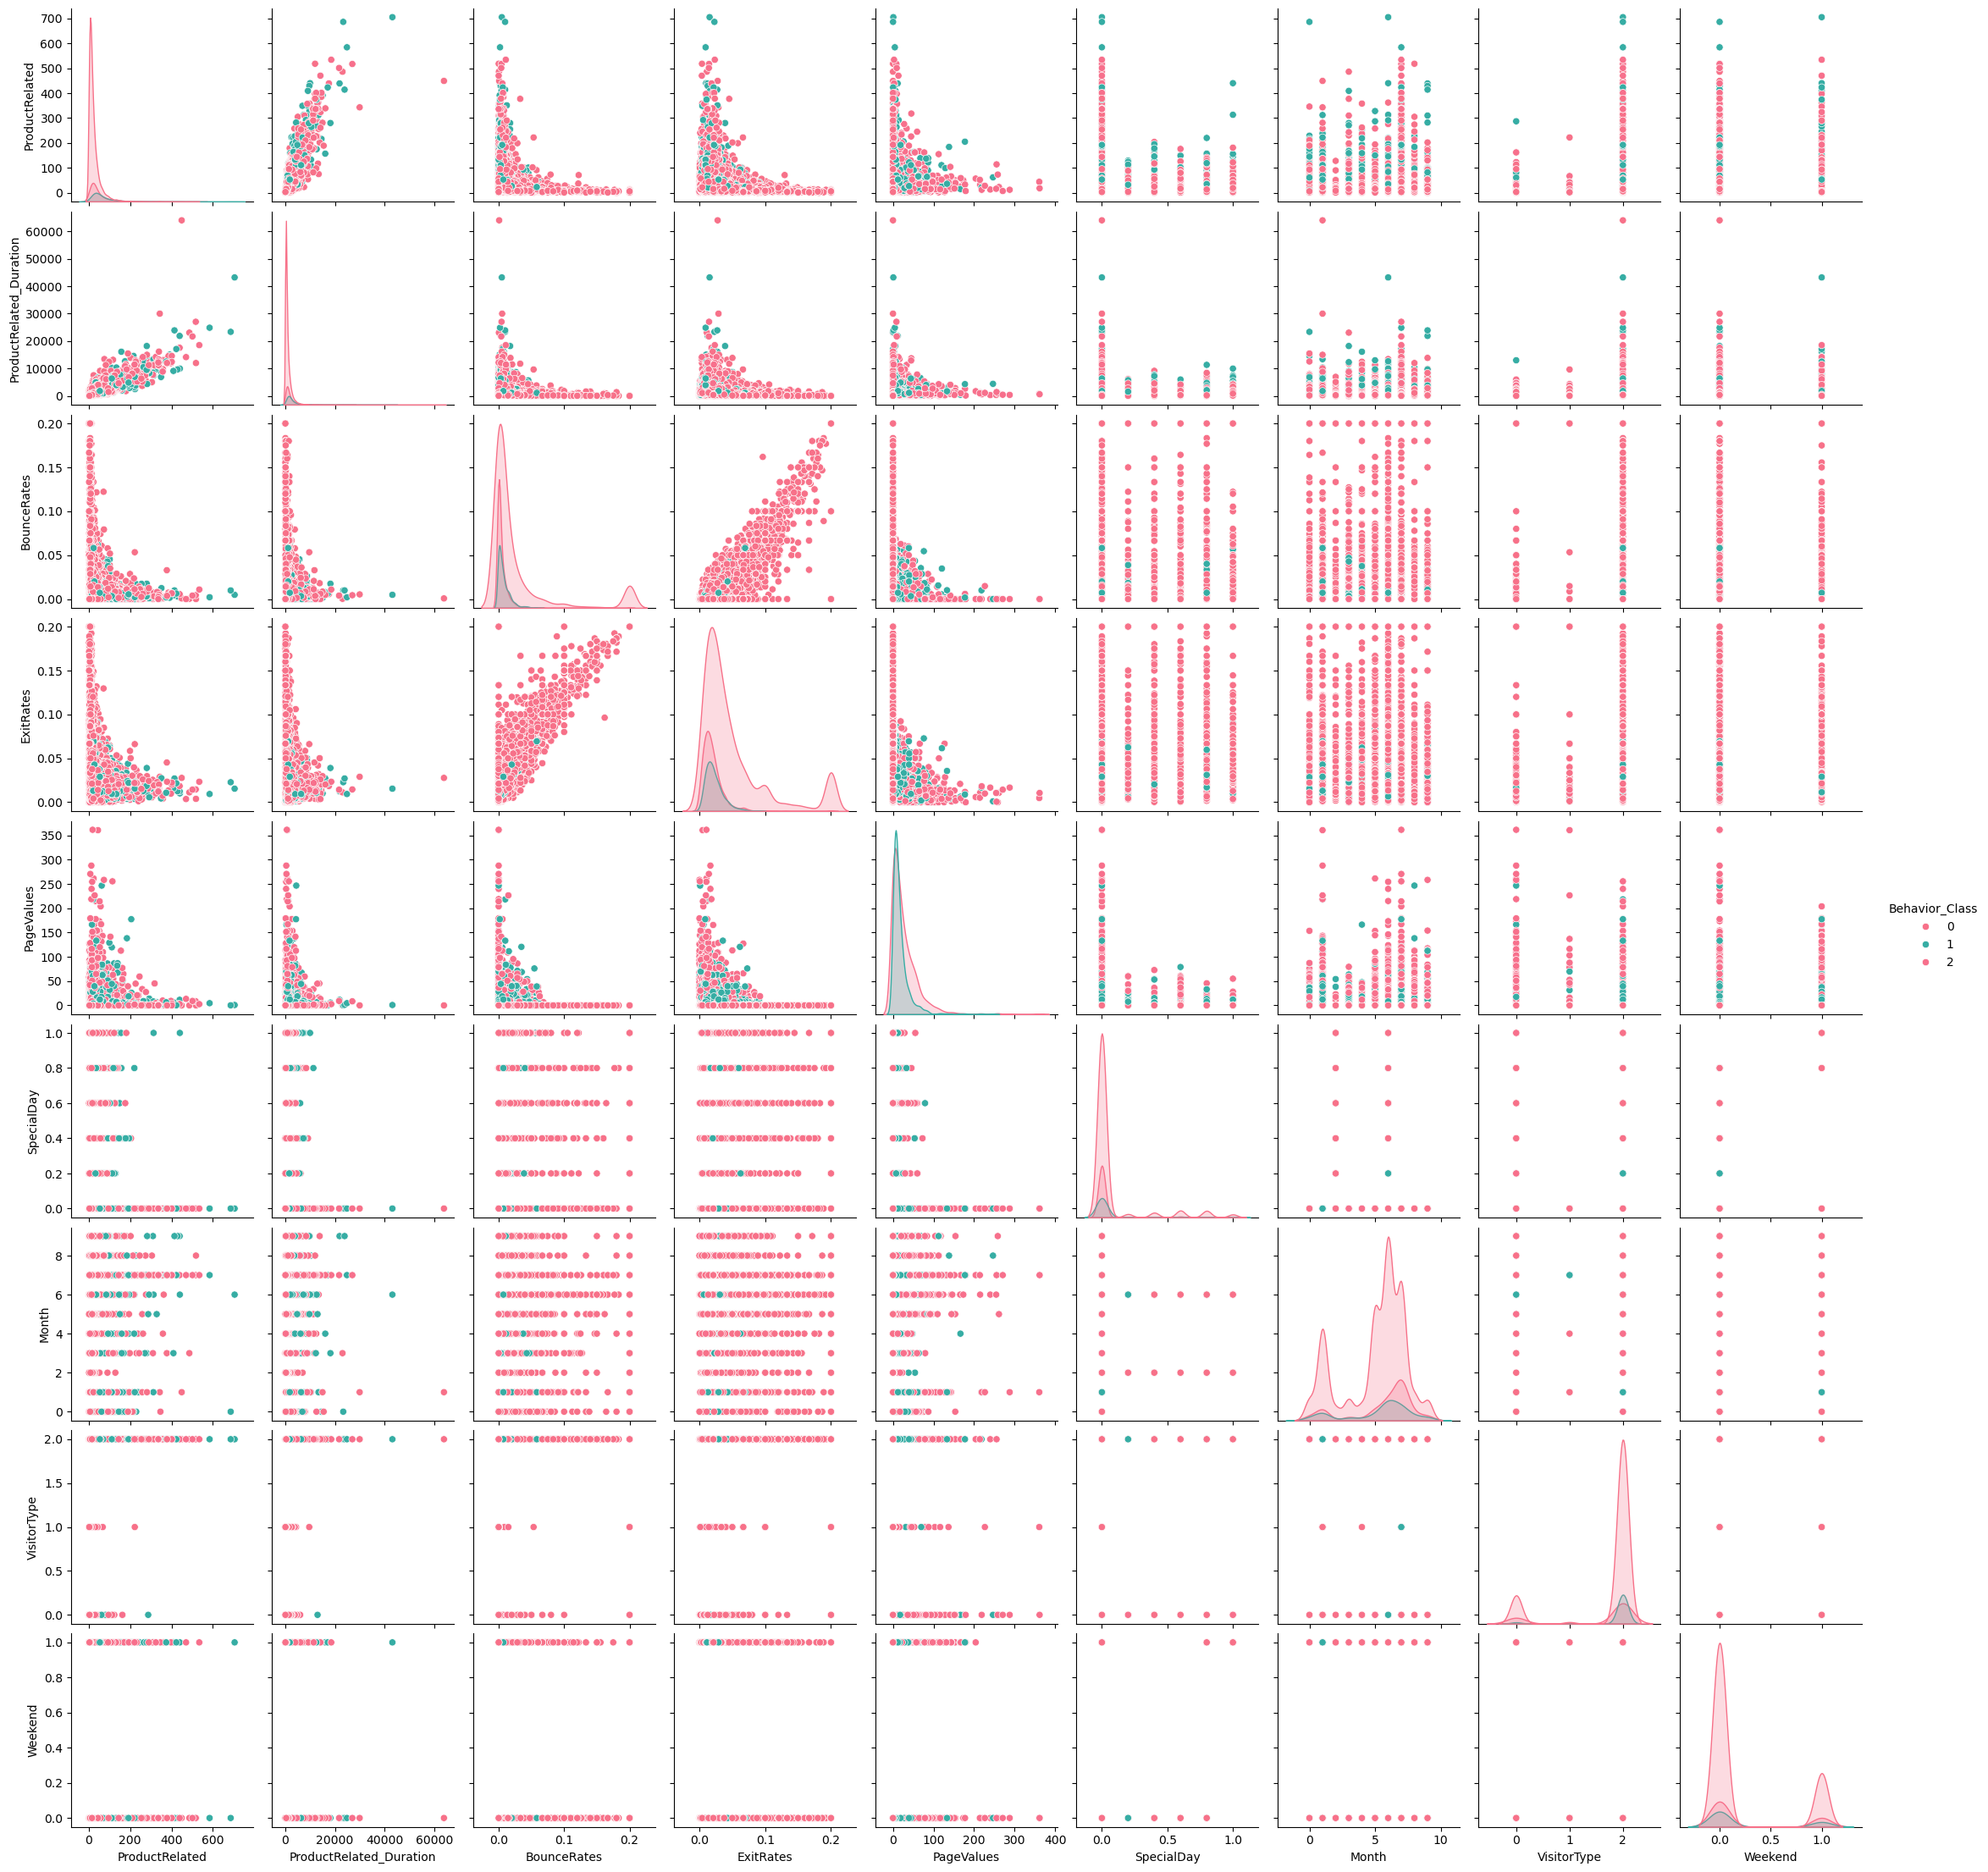

In [30]:
sns.pairplot(df, hue="Behavior_Class", palette='husl')
sns.despine()

In [31]:
df.skew()

ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
Month                     -0.832535
VisitorType               -2.065135
Weekend                    1.265962
Behavior_Class             1.460156
dtype: float64

Skewness should ideally lie between −1 and +1.
Values outside this range indicate significant skewness and may require transformation (log, sqrt, or Box–Cox).

| Skewness value   | Meaning                              |
| ---------------- | ------------------------------------ |
| **0**            | Perfectly symmetric distribution     |
| **−0.5 to +0.5** | Approximately symmetric (ideal)      |
| **−1 to +1**     | Acceptable / moderately skewed       |
| **< −1 or > +1** | Highly skewed (needs transformation) |


## checking Z-score to remove outliers

In [32]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(12330, 10)

In [33]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     2, ..., 12313, 12321, 12321], shape=(2614,)), array([2, 3, 2, ..., 4, 2, 3], shape=(2614,)))


In [34]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(12330, 10)
(10610, 10)


some outliers got removed

In [35]:
#finds data loss
loss_percent=(12330-10610)/(12330*100)
print(loss_percent)

0.0013949716139497162


since data percentage loss is too low and its cleaned now

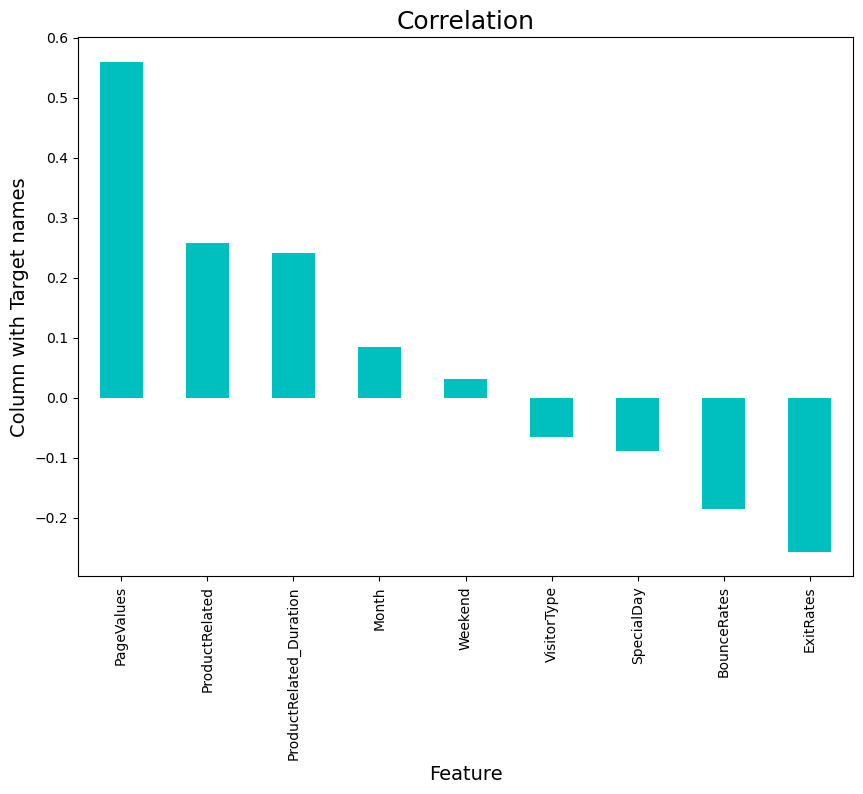

In [36]:
plt.figure(figsize=(10,7))
df.corr()['Behavior_Class'].sort_values(ascending=False).drop(['Behavior_Class']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [37]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

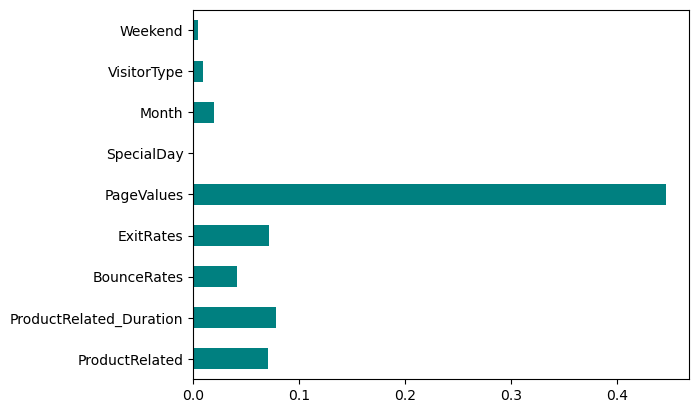

In [38]:
#selecting feature for to predict the target
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [39]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.86150546, -1.41818118, -0.83830576, ..., -1.35289747,
         0.42505255, -0.54765545],
       [-1.86150546, -2.48010821,  1.91248953, ..., -1.35289747,
         0.42505255, -0.54765545],
       [-0.5802157 ,  0.00258425,  1.23223552, ..., -1.35289747,
         0.42505255,  1.82596559],
       ...,
       [-1.03374946, -0.84457764,  2.02064661, ...,  0.79688928,
         0.42505255,  1.82596559],
       [-0.19777641, -0.43614949, -0.83830576, ...,  0.79688928,
         0.42505255, -0.54765545],
       [-1.5836953 , -1.88952428, -0.83830576, ...,  0.79688928,
        -2.36057389,  1.82596559]], shape=(10610, 9))

In [40]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [41]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.40466651 0.08559258 0.99992437 ... 0.56195554 1.         0.        ]
 [0.4760455  0.39367245 0.44111196 ... 1.         1.         0.        ]
 [0.70610502 0.65909759 0.65238298 ... 0.05550042 1.         0.        ]
 ...
 [0.40466651 0.35532801 0.         ... 0.84449275 0.         0.        ]
 [0.91266806 0.83043299 0.32534124 ... 0.84449275 1.         0.        ]
 [0.59748856 0.61677513 0.         ... 0.69831036 1.         1.        ]]
[[0.19775059 0.27416423 0.         ... 0.56195554 1.         0.        ]
 [0.71104923 0.47543561 0.5643418  ... 0.43603167 1.         0.        ]
 [0.19775059 0.23244439 0.         ... 0.56195554 1.         0.        ]
 ...
 [0.81999677 0.79054727 0.67233582 ... 0.56195554 1.         1.        ]
 [0.4250075  0.38040449 0.         ... 0.43603167 0.         1.        ]
 [0.69585981 0.71830278 0.21153352 ... 0.56195554 1.         1.        ]]


MODEL PREDICTION

Encoded categorical features 

Month = 2 → already label-encoded

VisitorType = 2 → encoded (e.g., Returning / New / Other)

Weekend = 0 or 1 → binary 

Behavior_Class = 0 → target label 

Scale the numerical columns

Example:

ProductRelated_Duration (0 → 627.5)

BounceRates (0.00 → 0.20)

Large value differences can slow learning.

It represents the average value of pages visited before a transaction

If a user is close to purchasing, PageValues becomes high

Strongly correlated with conversion / buying behavior

PageValues is the most important feature because it directly reflects users’ purchase intention 
and has the strongest correlation with conversion behavior.


Skewness values should typically lie in this range:

Acceptable range

−1 to +1

Interpretation

Skewness value	Meaning
0	Perfectly symmetric distribution
−0.5 to +0.5	Approximately symmetric (ideal)
−1 to +1	Acceptable / moderately skewed
< −1 or > +1	Highly skewed (needs transformation)

Skewness should ideally lie between −1 and +1.
Values outside this range indicate significant skewness and may require transformation (log, sqrt, or Box–Cox).    



In [42]:
!pip install xgboost


In [43]:
import pandas as pd
import numpy as np
import pickle
import os

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

from xgboost import XGBClassifier


# ============================
# Models & Hyperparameters
# ============================
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            "clf__C": [0.01, 0.1, 1, 10]
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {
            "clf__max_depth": [5, 10, 20],
            "clf__min_samples_split": [2, 10]
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "clf__n_neighbors": [3, 5, 7],
            "clf__weights": ["uniform", "distance"]
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            "clf__n_estimators": [100, 200],
            "clf__max_depth": [10, 20]
        }
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        {
            "clf__n_estimators": [100, 200],
            "clf__learning_rate": [0.05, 0.1]
        }
    )
}

results = {}
best_models = {}

# ============================
# Training + GridSearchCV
# ============================
for name, (model, params) in models.items():

    print(f"\nTraining: {name}")

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=params,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid.fit(new_xtrain, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(new_xtest)

    # ----- AUC HANDLING (Binary + Multi-class) -----
    try:
        y_prob = best_model.predict_proba(new_xtest)

        if len(np.unique(y_test)) == 2:
            auc = roc_auc_score(y_test, y_prob[:, 1])
        else:
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")

    except Exception:
        auc = "Not Applicable"

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),

        "AUC": auc,

        "Precision": precision_score(
            y_test, y_pred, average="weighted"
        ),

        "Recall": recall_score(
            y_test, y_pred, average="weighted"
        ),

        "F1": f1_score(
            y_test, y_pred, average="weighted"
        ),

        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    best_models[name] = best_model

    print(f"{name} completed.")


# ============================
# Convert Results to DataFrame
# ============================

results_df = pd.DataFrame(results).T
print("\nFinal Model Results:\n")
print(results_df)

# ============================
# Save Models Safely
# ============================

# Create folder if not exists
os.makedirs("models", exist_ok=True)

with open("models/saved_models.pkl", "wb") as f:
    pickle.dump(best_models, f)

print("\nAll models saved successfully in 'models/saved_models.pkl'")


Training: Logistic Regression
Logistic Regression completed.

Training: Decision Tree
Decision Tree completed.

Training: KNN
KNN completed.

Training: Naive Bayes
Naive Bayes completed.

Training: Random Forest
Random Forest completed.

Training: XGBoost
XGBoost completed.

Final Model Results:

                     Accuracy       AUC  Precision    Recall        F1  \
Logistic Regression  0.882658  0.935683   0.870792  0.882658  0.875462   
Decision Tree        0.886428  0.945047   0.879966  0.886428  0.878199   
KNN                  0.886899  0.921199   0.876700  0.886899  0.880481   
Naive Bayes          0.877003  0.927520   0.888030  0.877003  0.857870   
Random Forest        0.894439  0.949721   0.885718  0.894439  0.888238   
XGBoost              0.893497  0.950164   0.884529  0.893497  0.887211   

                          MCC  
Logistic Regression  0.697643  
Decision Tree        0.711854  
KNN                  0.709639  
Naive Bayes          0.699418  
Random Forest        0

In [44]:
# ----- SAVE RESULTS CSV -----
os.makedirs("models", exist_ok=True)

results_df = pd.DataFrame(results).T

results_df.to_csv("models/model_results.csv")

with open("models/saved_models.pkl", "wb") as f:
    pickle.dump(best_models, f)

print("\nAll models and results saved successfully in 'models/' folder")



All models and results saved successfully in 'models/' folder


In [45]:
results_df = pd.DataFrame(results).T
print("\nFinal Model Results:\n")
print(results_df)

os.makedirs("models", exist_ok=True)

results_df.to_csv("models/model_results.csv")

with open("models/saved_models.pkl", "wb") as f:
    pickle.dump(best_models, f)

print("\nAll models saved successfully in 'models/' folder")



Final Model Results:

                     Accuracy       AUC  Precision    Recall        F1  \
Logistic Regression  0.882658  0.935683   0.870792  0.882658  0.875462   
Decision Tree        0.886428  0.945047   0.879966  0.886428  0.878199   
KNN                  0.886899  0.921199   0.876700  0.886899  0.880481   
Naive Bayes          0.877003  0.927520   0.888030  0.877003  0.857870   
Random Forest        0.894439  0.949721   0.885718  0.894439  0.888238   
XGBoost              0.893497  0.950164   0.884529  0.893497  0.887211   

                          MCC  
Logistic Regression  0.697643  
Decision Tree        0.711854  
KNN                  0.709639  
Naive Bayes          0.699418  
Random Forest        0.729844  
XGBoost              0.727193  

All models saved successfully in 'models/' folder
